In [458]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## INTRO

## 1.1

In [459]:
df_train = pd.read_csv("gold_recovery_train.csv")
display(df_train.head())
df_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [460]:
df_test = pd.read_csv("gold_recovery_test.csv")
display(df_test.head())
df_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [461]:
df_full = pd.read_csv("gold_recovery_full.csv")
display(df_full.head())
df_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


The above code loads three CSV files into pandas DataFrames for a gold recovery process: df_train for training data, df_test for test data, and df_full for the complete dataset. This initial step helps inspect the data structure and verify its integrity. 

## 1.2

In [462]:
missing_values = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']].isna().sum()
print(missing_values)

zero_denom = ((df_train['rougher.input.feed_au'] * 
               (df_train['rougher.output.concentrate_au'] - 
                df_train['rougher.output.tail_au'])) == 0).sum()
print(f"Number of zero denominators: {zero_denom}")


rougher.output.concentrate_au      82
rougher.input.feed_au              83
rougher.output.tail_au           2249
dtype: int64
Number of zero denominators: 63


In [463]:
df_train = df_train[df_train['rougher.output.concentrate_au'] != 0]
df_train = df_train[df_train['rougher.input.feed_au'] != 0]
df_train = df_train[df_train['rougher.output.tail_au'] != 0]

In [464]:
df_train = df_train.dropna(subset=['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au'])

Before we get into the recovery calculation we have to clean up our data a bit. The columns `rougher.output.concentrate_au`, `rougher.input.feed_au`, and `rougher.output.tail_au` all contain 0s which will result in divide by 0 errors. We are interested in these columns as we need them for our recovery calcuation. There are also columns with Na values. We remove those values to do our calculations.

In [465]:
#Recovery calculation
def recovery_calculation(row):
  C = row["rougher.output.concentrate_au"]
  F = row["rougher.input.feed_au"]
  T = row["rougher.output.tail_au"]
  return ((C * (F - T)) / (F * (C - T))) * 100

df_train["recovery_calculation"] = df_train.apply(recovery_calculation, axis=1)
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery_calculation
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [466]:
df_train.dropna(subset=['rougher.output.recovery'], inplace=True)
mae = mean_absolute_error(df_train['recovery_calculation'], df_train['rougher.output.recovery'])

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 9.42194382623715e-15


Here we define our `recovery_calculation` function and perform the calculation. We can see that there are the columns that we previously cleaned up are used for our recovery function. From there we calculate the MAE as near zero which means that the calculations are accurate.

## 1.3

In [467]:
diff1 = list(set(df_train.columns) - set(df_test.columns))
diff2 = list(set(df_test.columns) - set(df_train.columns))
all_differences = diff1 + diff2

print(f"Columns in train but not in test: {len(diff1)}")
print(f"Columns in test but not in train: {len(diff2)}")
print("All differences:", len(all_differences))
diff_cols = [col for col in all_differences if col in df_train.columns]
diff_col_type = [str(df_train[col].dtype) for col in diff_cols]

display(pd.DataFrame({'Column Diff': diff_cols, 'Type': diff_col_type}))


Columns in train but not in test: 35
Columns in test but not in train: 0
All differences: 35


,Column Diff,Type
0,final.output.concentrate_pb,float64
1,final.output.tail_au,float64
2,rougher.output.tail_sol,float64
3,primary_cleaner.output.concentrate_au,float64
4,secondary_cleaner.output.tail_pb,float64
5,rougher.output.recovery,float64
6,rougher.output.concentrate_ag,float64
7,primary_cleaner.output.tail_pb,float64
8,final.output.recovery,float64
9,final.output.concentrate_au,float64


Here we compare the column names of the df_train and df_test DataFrames. First, we calculate diff1, which contains the columns that are in df_train but not in df_test, and diff2, which holds the columns present in df_test but missing from df_train. It then combines both lists into all_differences to capture all mismatched columns. The script prints the number of columns unique to each DataFrame and the total number of differences. Finally, we display the differences in a DataFrame format with two columns showing the name and data type. This allows for a clear inspection of the columns and data types.

# 2.1

In [468]:
df_concentrations = df_train[[
  'rougher.output.tail_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb',
  'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
  'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
  'final.output.tail_au', 'final.output.tail_ag', 'final.output.tail_pb',
]]
df_concentrations.columns = pd.MultiIndex.from_tuples(
    [tuple(col.split('.output.tail_')) for col in df_concentrations.columns],
    names=["Stage", "Element"]
)

display(df_concentrations)

Stage     rougher                     primary_cleaner                       \
Element        au        ag        pb              au         ag        pb   
0        1.170244  5.008018  0.508728        2.106679  14.936526  2.534912   
1        1.184827  4.955378  0.536689        2.353017  16.250511  3.049646   
2        1.162562  4.843460  0.546416        2.416800  16.491823  3.124664   
3        1.079755  4.655288  0.542525        2.262051  16.024359  2.960362   
4        1.012642  4.552800  0.515438        2.277073  16.480185  3.112100   
...           ...       ...       ...             ...        ...       ...   
16855    0.748633  4.207261  0.612935        2.314352  22.854592  6.531541   
16856    0.771582  4.177943  0.650557        2.462890  23.002490  6.629725   
16857    0.685059  4.050010  0.636095        2.612231  22.298149  6.278250   
16858    0.567130  3.902494  0.625609        2.800648  22.714656  6.253145   
16859    0.586439  3.925473  0.638677        2.708046  22.735927  6.084287   

Stage   secondary_cleaner                          final                       
Element                au         ag        pb        au         ag        pb  
0                2.606185  14.500184  4.694824  2.143149  10.411962  0.895447  
1                2.488248  14.265474  4.592547  2.224930  10.462676  0.927452  
2                2.458187  14.115662  4.624775  2.257889  10.507046  0.953716  
3                2.322062  13.732071  4.482453  2.146849  10.422762  0.883763  
4                2.330448  14.079996  4.470737  2.055292  10.360302  0.792826  
...                   ...        ...       ...       ...        ...       ...  
16855            0.000000   0.000000  0.000000  1.529220   8.769645  3.141541  
16856            0.000000   0.000000  0.000000  1.612542   8.897321  3.130493  
16857            0.000000   0.000000  0.000000  1.596616   8.529606  2.911418  
16858            0.000000   0.000000  0.000000  1.602879   8.777171  2.819214  
16859            0.000000   0.000000  0.000000  1.389434   8.406690  2.517518  

[13967 rows x 12 columns]

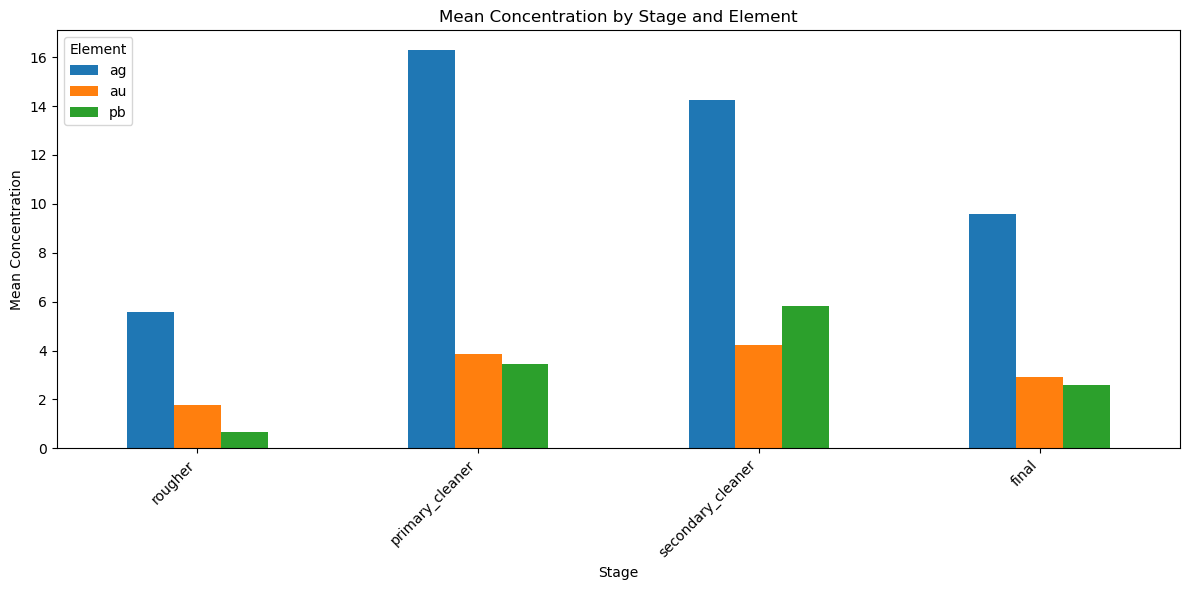

In [469]:
mean_concentrations = df_concentrations.mean()

# Unstack the multi-index to prepare for plotting
mean_concentrations_unstacked = mean_concentrations.unstack()
stage_order = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']
mean_concentrations_unstacked = mean_concentrations_unstacked.loc[stage_order]

mean_concentrations_unstacked.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Stage')
plt.ylabel('Mean Concentration')
plt.title('Mean Concentration by Stage and Element')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Element', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Here we look at how the material changes over the different stages. At first in the rougher stage the concentrations are fairly low due to the elements being mixed with others. Over the stages the concentrations change as the material goes through the process. At the end we can see we have a final au level around 3.5.

## 2.2

In [470]:
df_feed_size_cols = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size'] 
df_feed_size_train = df_train[df_feed_size_cols]
df_feed_size_test = df_test[df_feed_size_cols]

print("Train Feed Size DataFrame:")
display(df_feed_size_train.describe())
print("Test Feed Size DataFrame:")
display(df_feed_size_test.describe())

Train Feed Size DataFrame:


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,13819.000000,13967.000000
mean,60.090328,7.322107
std,22.461761,0.617797
min,9.659576,1.080000
25%,48.979622,6.960000
50%,55.393617,7.300000
75%,65.988329,7.700000
max,484.967466,10.470000


Test Feed Size DataFrame:


,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5834.000000,5856.000000
mean,55.937535,7.264651
std,22.724254,0.611526
min,0.046369,5.650000
25%,43.890852,6.885625
50%,50.002004,7.259333
75%,61.638434,7.650000
max,477.445473,15.500000


In this section we compare the feed sizes in the train and test sets. We display the results for comparison. As we can see the two datasets are very close with the mean of `df_train['rougher.input.feed_size']` equal to 57.3 and the mean of `df_test['rougher.input.feed_size]` equal to 55.9. These values are very close together as are the other values. This means the train and test data sets are ready to build a model around.

## 2.3

In [471]:
df_concentrations.describe()

Stage         rougher                             primary_cleaner  \
Element            au            ag            pb              au   
count    13967.000000  13966.000000  13967.000000    13967.000000   
mean         1.757044      5.558259      0.654094        3.846249   
std          0.728008      1.052255      0.269857        1.651549   
min          0.020676      0.594562      0.007566        0.000000   
25%          1.306360      4.899669      0.472853        2.859428   
50%          1.739851      5.711724      0.625805        3.498040   
75%          2.187156      6.308074      0.796664        4.495131   
max          9.688980     12.719177      3.778064       17.788925   

Stage                               secondary_cleaner                \
Element            ag            pb                au            ag   
count    13966.000000  13951.000000      13967.000000  13965.000000   
mean        16.284476      3.432568          4.212742     14.259269   
std          3.784808      1.495180          2.355141      4.494774   
min          0.000000      0.000000          0.000000      0.000000   
25%         13.851170      2.409823          3.139377     12.151223   
50%         15.788126      3.204298          3.968910     15.361459   
75%         18.431786      4.247166          4.869454     17.218339   
max         29.459575      9.634565         26.811643     23.264738   

Stage                         final                              
Element            pb            au            ag            pb  
count    13957.000000  13967.000000  13967.000000  13853.000000  
mean         5.818952      2.904737      9.580623      2.583596  
std          2.862642      0.917669      2.352450      0.975716  
min          0.000000      0.000000      0.000000      0.000000  
25%          3.962253      2.358965      7.975290      1.894723  
50%          5.409771      2.838092      9.480791      2.570126  
75%          7.763612      3.421102     10.999095      3.220913  
max         17.042505      8.197408     19.552149      5.639565

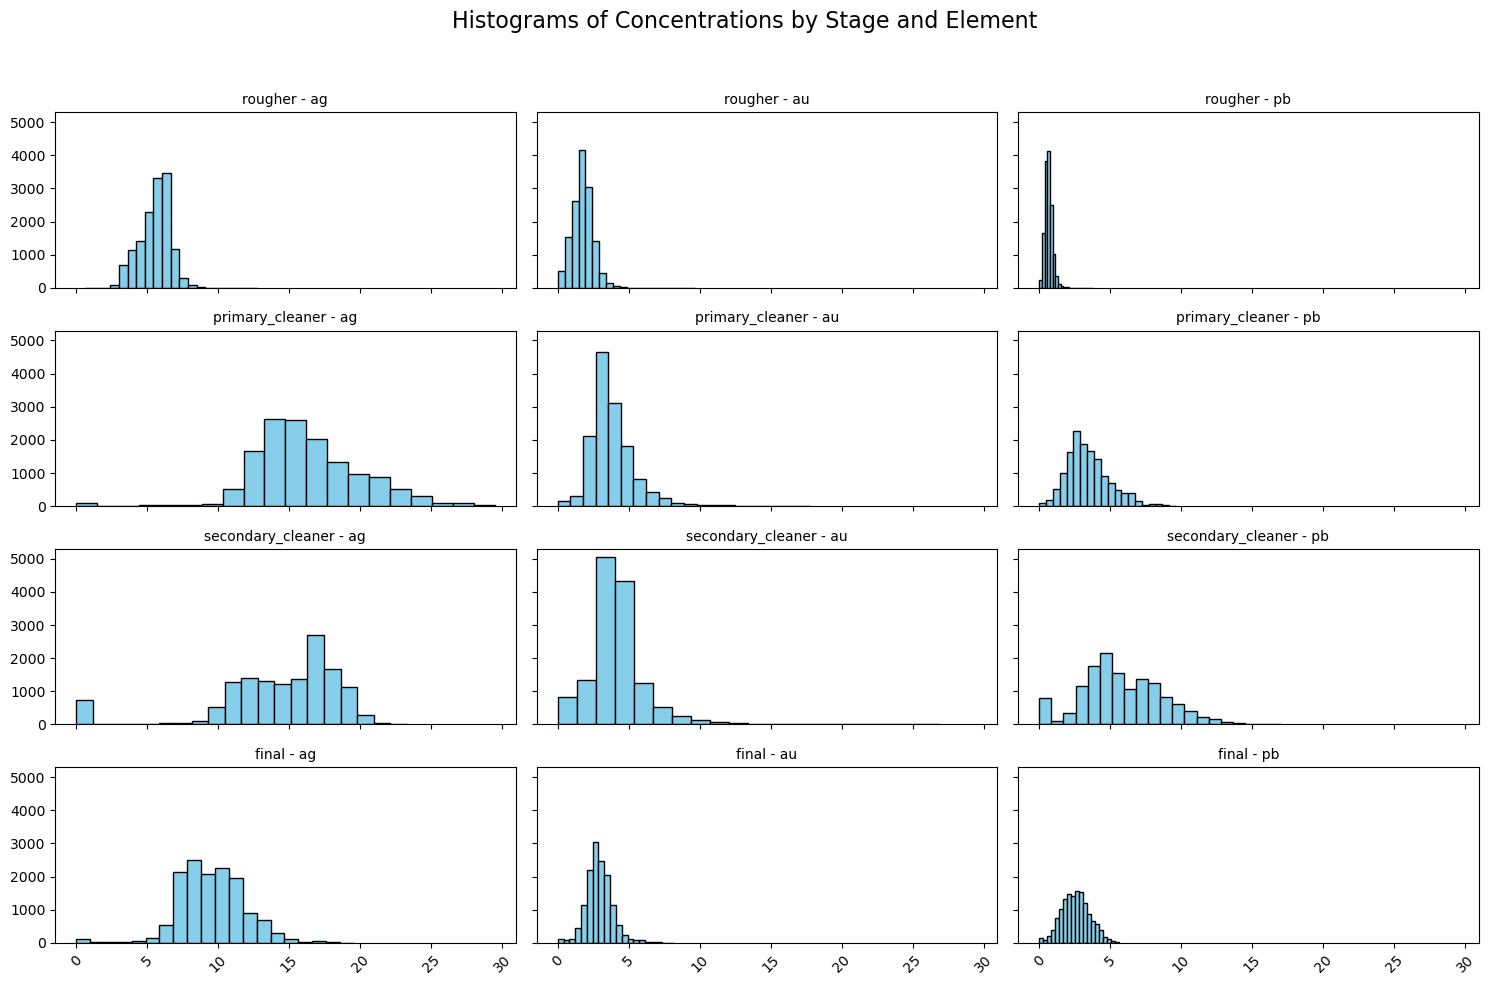

In [472]:
stage_order = ['rougher', 'primary_cleaner', 'secondary_cleaner', 'final']
stages = [stage for stage in stage_order if stage in df_concentrations.columns.levels[0]]
elements = df_concentrations.columns.levels[1] 

fig, axes = plt.subplots(len(stages), len(elements), figsize=(15, 10), sharey=True, sharex=True)
fig.suptitle('Histograms of Concentrations by Stage and Element', fontsize=16)

for i, stage in enumerate(stages):
    for j, element in enumerate(elements):
        data = df_concentrations[stage, element]
        ax = axes[i, j]
        ax.hist(data, bins=20, color='skyblue', edgecolor='black')
        ax.set_title(f'{stage} - {element}', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

In [473]:
df_train = df_train[df_train['primary_cleaner.output.concentrate_ag'] != 0]
df_train = df_train[df_train['secondary_cleaner.output.tail_ag'] != 0]
df_train = df_train[df_train['secondary_cleaner.output.tail_pb'] != 0]
df_train = df_train[df_train['final.output.concentrate_ag'] != 0]
df_train = df_train.dropna()

Here we perform data analysis and visualization on the df_concentrations DataFrame, followed by data cleaning on the df_train DataFrame. First, it calls describe() on df_concentrations to generate summary statistics. First we unpack the multi index into columns and order the stages. We then create a grid of subplots (fig, axes) with dimensions based on the number of stages and elements. Next we iterate over the stages and elements, plotting histograms of concentration values for each combination. After visualizing the data, we filter df_train by removing rows where specific concentration values (primary_cleaner.output.concentrate_ag, secondary_cleaner.output.tail_ag, secondary_cleaner.output.tail_pb, and final.output.concentrate_ag) are equal to zero. Finally, we drop any remaining rows with missing values using dropna(), ensuring the training data is clean and complete.

## 3.1

In [ ]:
#sMAPE function
def calculate_smape(y_true, y_pred):
  numerator = abs(y_true - y_pred)
  denominator = (abs(y_true) + abs(y_pred)) / 2
  smape = (numerator / denominator).mean() * 100
  return smape

def calculate_final_smape(y_rougher_true, y_rougher_pred, y_final_true, y_final_pred):
  smape_rougher = calculate_smape(y_rougher_true, y_rougher_pred)
  smape_final = calculate_smape(y_final_true, y_final_pred)
  return 0.25 * smape_rougher + 0.75 * smape_final

In [475]:
drop_feature_columns = ["date", "rougher.output.recovery", "final.output.recovery"]
df_train[drop_feature_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10348 entries, 0 to 16845
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     10348 non-null  object 
 1   rougher.output.recovery  10348 non-null  float64
 2   final.output.recovery    10348 non-null  float64
dtypes: float64(2), object(1)
memory usage: 323.4+ KB


In [476]:
features = df_train.drop(columns=drop_feature_columns)  # Features
target = df_train["final.output.recovery"]  # Target

In [477]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

model = DecisionTreeRegressor(random_state=12345)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"sMAPE {calculate_final_smape(y_test, y_pred)}")

sMAPE 2.930826099053591


In [478]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"sMAPE {calculate_final_smape(y_test, y_pred)}")

sMAPE 1.4476313600602306


In this section we define our sMAPE functions and experiment with different models. First we define two functions: calculate_smape() computes the sMAPE by dividing the absolute difference between the actual and predicted values by their average, while calculate_final_smape() calculates a weighted average of the sMAPE for the rougher and final stages, assigning 25% weight to the rougher stage and 75% to the final stage. Then we remove unnecessary columns ("date", "rougher.output.recovery", and "final.output.recovery") from df_train, splitting the remaining data into features and target. Next we use train_test_split() to divide the data into training and test sets with a 75-25% split. After that we train a DecisionTreeRegressor model on the training data, makes predictions on the test set, and prints the final sMAPE score. It then repeats the process with a LinearRegression model, fitting it to the training data, predicting on the test set, and printing its sMAPE score. This allows for a comparison of the two models' performance based on the sMAPE metric.

For the DecisionTreeRegressor we get a result of 2.93 and for the LinearRegression we get a 1.44. We are looking for a smaller sMAPE value and the LinearRegression model delivers that. 